# Comparaison of two policies

In this notebook, we give the possibilty to compare two policies

Given two trained policies, for each policy we will simulate a certain number of rounds against a random policy, and we check if one is significantly better than the other

## Imports

In [1]:
import statsmodels
import pandas as pd
import numpy as np
import scipy.stats as scs
import sys
sys.path.append("../")
import matplotlib.pyplot as plt

from policy_against_random_generation import policy_competition

/anaconda/envs/gym-coinche/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda/envs/gym-coinche/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda/envs/gym-coinche/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda/envs/gym-coinche/lib/python3.7/site-packages/tensorflow/pyth

In [3]:
NUM_EPISODES = 5001
policy_algo = ["Random",
               "Random",
               "Random",
               "Random"]

contrat_model_path = None


random_data, random_attack = policy_competition(policies=policy_algo, 
                                                env_name = "coinche-v3",
                                                contrat_model_path=contrat_model_path, 
                                                NUM_EPISODES=NUM_EPISODES)

Contrat model passed:  None
Contrat model passed:  None
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
Done


In [4]:
random_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na2_as_p4,na3_7_p4,na3_8_p4,na3_9_p4,na3_10_p4,na3_jack_p4,na3_queen_p4,na3_king_p4,na3_as_p4,total_reward
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,128.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,104.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,106.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0


## Sizing the test

In a first approach, we are making an A/B test. So we need to to have an estimation of the size of the samples that will be needed

count    5001.000000
mean       80.889422
std        35.181392
min         0.000000
25%        55.000000
50%        81.000000
75%       106.000000
max       162.000000
Name: total_reward, dtype: float64


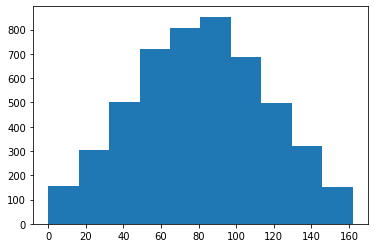

In [5]:
plt.hist(random_data["total_reward"])
print(random_data["total_reward"].describe())

In [6]:
# We want to be able to detect one point of difference of total reward for the attack, and one point for defense
mde = 1
risk1 = 0.05
risk2 = 0.2

# under a random policy, the distribution is centered in 82 with std of 35
std = 35

In [7]:
def size_sample_AB_test(risk1, risk2, var, mde, bilateral=False):

    if bilateral:
        Z_alpha = scs.norm(0, 1).ppf(1 - risk1/2)
    else:
        Z_alpha = scs.norm(0, 1).ppf(1 - risk1)

    Z_beta = scs.norm(0, 1).ppf(1 - risk2)

    min_N = (2*(var)*(Z_beta + Z_alpha)**2 / mde**2)

    return min_N

size_sample_AB_test(risk1, risk2, var = std**2, mde = mde, bilateral=True)

19229.755349155268

We will make the assumption that std is not really moving even with better policies.
Moreover, we'll take a bit bigger samples to be sure (as it doesn't cost anything to do so)

## Comparing policies

In [ ]:
policy_algo = ["experiments/coinche/08_05_2020-16_10/checkpoint/0_Step-81.ckpt",
               "experiments/coinche/08_05_2020-16_10/checkpoint/1_Step-434.ckpt"]


In [ ]:
NUM_EPISODES = 40000
policy_algo = ["../experiments/coinche/08_05_2020-16_10/checkpoint/0_Step-81.ckpt",
               "../experiments/coinche/08_05_2020-16_10/checkpoint/1_Step-434.ckpt",
               "../experiments/coinche/08_05_2020-16_10/checkpoint/0_Step-81.ckpt",
               "../experiments/coinche/08_05_2020-16_10/checkpoint/1_Step-434.ckpt"]

contrat_model_path = "reward_prediction/reward_model.h5"


competition_data, competition_attack = policy_competition(policies=policy_algo, env_name = "coinche-v3",
                       contrat_model_path=contrat_model_path, NUM_EPISODES=NUM_EPISODES)

Contrat model passed:  None
Contrat model passed:  None

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../experiments/coinche/08_05_2020-16_10/checkpoint/0_Step-81.ckpt
INFO:tensorflow:Restoring parameters from ../experiments/coinche/08_05_2020-16_10/checkpoint/1_Step-434.ckpt
INFO:tensorflow:Restoring parameters from ../experiments/coinche/08_05_2020-16_10/checkpoint/0_Step-81.ckpt
INFO:tensorflow:Restoring parameters from ../experiments/coinche/08_05_2020-16_10/checkpoint/1_Step-434.ckpt
0
500
1000
1500
2000
2500
3000
3500
4000


In [3]:
competition_data = competition_data.merge(competition_attack, right_index = True,
                               left_index = True)

competition_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na3_10_p4,na3_jack_p4,na3_queen_p4,na3_king_p4,na3_as_p4,total_reward,p0,p1,p2,p3
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,97.0,1,0,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,52.0,1,0,1,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,136.0,0,1,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,114.0,1,0,1,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,74.0,0,1,0,1


In [4]:
competition_data.loc[:,'total_reward_team_02'] = np.where(competition_data['p0']==1, 
                                                          competition_data['total_reward'],
                                                          162-competition_data['total_reward']) 
competition_data.loc[:,'total_reward_team_13'] = np.where(competition_data['p1']==1, 
                                                          competition_data['total_reward'],
                                                          162-competition_data['total_reward']) 

In [5]:
# Check qu'autant de parties jouées en attaque qu'en défense
competition_data['p0'].value_counts()

0    206
1    194
Name: p0, dtype: int64

In [6]:
attack_02 = competition_data[competition_data['p0']==1]['total_reward_team_02']
defens_02 = competition_data[competition_data['p0']==0]['total_reward_team_02']
attack_13 = competition_data[competition_data['p1']==1]['total_reward_team_13']
defens_13 = competition_data[competition_data['p1']==0]['total_reward_team_13']

(array([ 6., 14., 23., 28., 27., 37., 28., 23., 12.,  8.]),
 array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160.]),
 <a list of 10 Patch objects>)

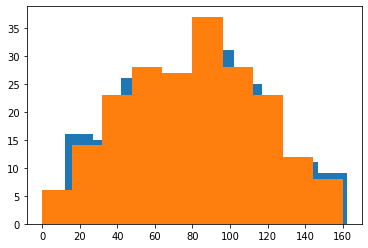

In [7]:
plt.hist(attack_02)
plt.hist(defens_02)

In [8]:
attack_02.describe(), defens_02.describe()

(count    194.000000
 mean      79.814433
 std       36.767391
 min       12.000000
 25%       49.750000
 50%       79.500000
 75%      106.000000
 max      162.000000
 Name: total_reward_team_02, dtype: float64,
 count    206.000000
 mean      79.932039
 std       36.215685
 min        0.000000
 25%       54.000000
 50%       81.500000
 75%      107.000000
 max      160.000000
 Name: total_reward_team_02, dtype: float64)

In [9]:
attack_02.head()

0     97.0
1     52.0
3    114.0
5     54.0
8     95.0
Name: total_reward_team_02, dtype: float64

In [10]:
defens_02.head()

2     26.0
4     88.0
6     54.0
7     58.0
10    51.0
Name: total_reward_team_02, dtype: float64

In [11]:
def test_H0(x_A, x_B, risk1, bilateral=False):

    # Calcul de t_AB : différence des moyennes normalisée
    diff_mean = (np.mean(x_B) - np.mean(x_A))  # diff entre les moyennes

    # Estimation de l'écart-type joint
    std_pooled = np.sqrt((np.var(x_B)/len(x_B)) + (np.var(x_A)/len(x_A)))
    stat = diff_mean/std_pooled  # différence normalisée

    # Seuil correspondant au risk de première espèce défini
    if bilateral:
        t = scs.norm(0, 1).ppf(1 - risk1/2)
        return np.abs(stat<t), t, stat
    else:
        t = scs.norm(0, 1).ppf(1 - risk1)
        return (stat < t), t, stat
    
def power_test(x_A, x_B, mde, risk1, bilateral=False):
    var_A = np.var(x_A)
    var_B = np.var(x_B)
    N_A = len(x_A)
    N_B = len(x_B)
    
    
    std_pooled = np.sqrt(var_A/N_A + var_B/N_B)
    expectation = mde/std_pooled
    t = test_H0(x_A, x_B, risk1, bilateral)[1]

    return (1 - scs.norm(expectation, 1).cdf(t))

In [12]:
# Attack

print('test attacks: ', test_H0(attack_02, attack_13, risk1, bilateral=True))
print("power attacks: ", power_test(attack_02, attack_13, mde, risk1, bilateral=True))
print('test defens: ', test_H0(defens_02, defens_13, risk1, bilateral=True))
print("power attacks: ", power_test(defens_02, defens_13, mde, risk1, bilateral=True))



NameError: name 'risk1' is not defined

In [50]:
attacker_df

,p0,p1,p2,p3
0,0,1,0,1
1,1,0,1,0
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
395,1,0,1,0
396,1,0,1,0
397,0,1,0,1
398,0,1,0,1
